In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("graduatoria-nazionale-anonima-medicina-e-odontoiatria-2022.csv", sep=";")
# df.set_index(["Posizione"], inplace=True)
df.head(5)

,Posizione,Ateneo,Codice,C.L.C.S.,Logica,Biologia,Chimica,Mat e Fisica,Punteggio TOT
0,1,Università degli Studi di VERONA,211212200054430,6,"7,5","34,5","22,5","19,5",90
1,2,Università degli Studi di Roma La Sapienza,100012102154330,6,"7,5","32,6","18,7",18,"82,8"
2,3,Università degli Studi di BOLOGNA,222000200044322,6,"7,5","28,8","20,6","19,5","82,4"
3,4,Universirà degli studi di Parma,10011111052232,6,"7,5","31,1","19,1","17,6","81,3"
4,5,Università degli Studi di BOLOGNA,211212002254432,6,"5,6","31,5","19,5","17,6","80,2"


In [4]:
df.columns[2:]

Index(['Codice', 'C.L.C.S.', 'Logica', 'Biologia', 'Chimica', 'Mat e Fisica',
       'Punteggio TOT'],
      dtype='object')

In [5]:
# print(type(df.iloc[0]["Punteggio TOT"]))
for col in df.columns[3:]:
    df[col] = df[col].apply(lambda x: float(x.replace(",", ".")))

df["Codice"] = df["Codice"].apply(lambda x: int(x))

df.head()

,Posizione,Ateneo,Codice,C.L.C.S.,Logica,Biologia,Chimica,Mat e Fisica,Punteggio TOT
0,1,Università degli Studi di VERONA,211212200054430,6.0,7.5,34.5,22.5,19.5,90.0
1,2,Università degli Studi di Roma La Sapienza,100012102154330,6.0,7.5,32.6,18.7,18.0,82.8
2,3,Università degli Studi di BOLOGNA,222000200044322,6.0,7.5,28.8,20.6,19.5,82.4
3,4,Universirà degli studi di Parma,10011111052232,6.0,7.5,31.1,19.1,17.6,81.3
4,5,Università degli Studi di BOLOGNA,211212002254432,6.0,5.6,31.5,19.5,17.6,80.2


In [6]:
df[["Posizione","Punteggio TOT"]].groupby(by="Punteggio TOT").count()

,Posizione
Punteggio TOT,
20.0,98
20.1,98
20.2,124
20.3,156
20.4,108
...,...
80.2,1
81.3,1
82.4,1


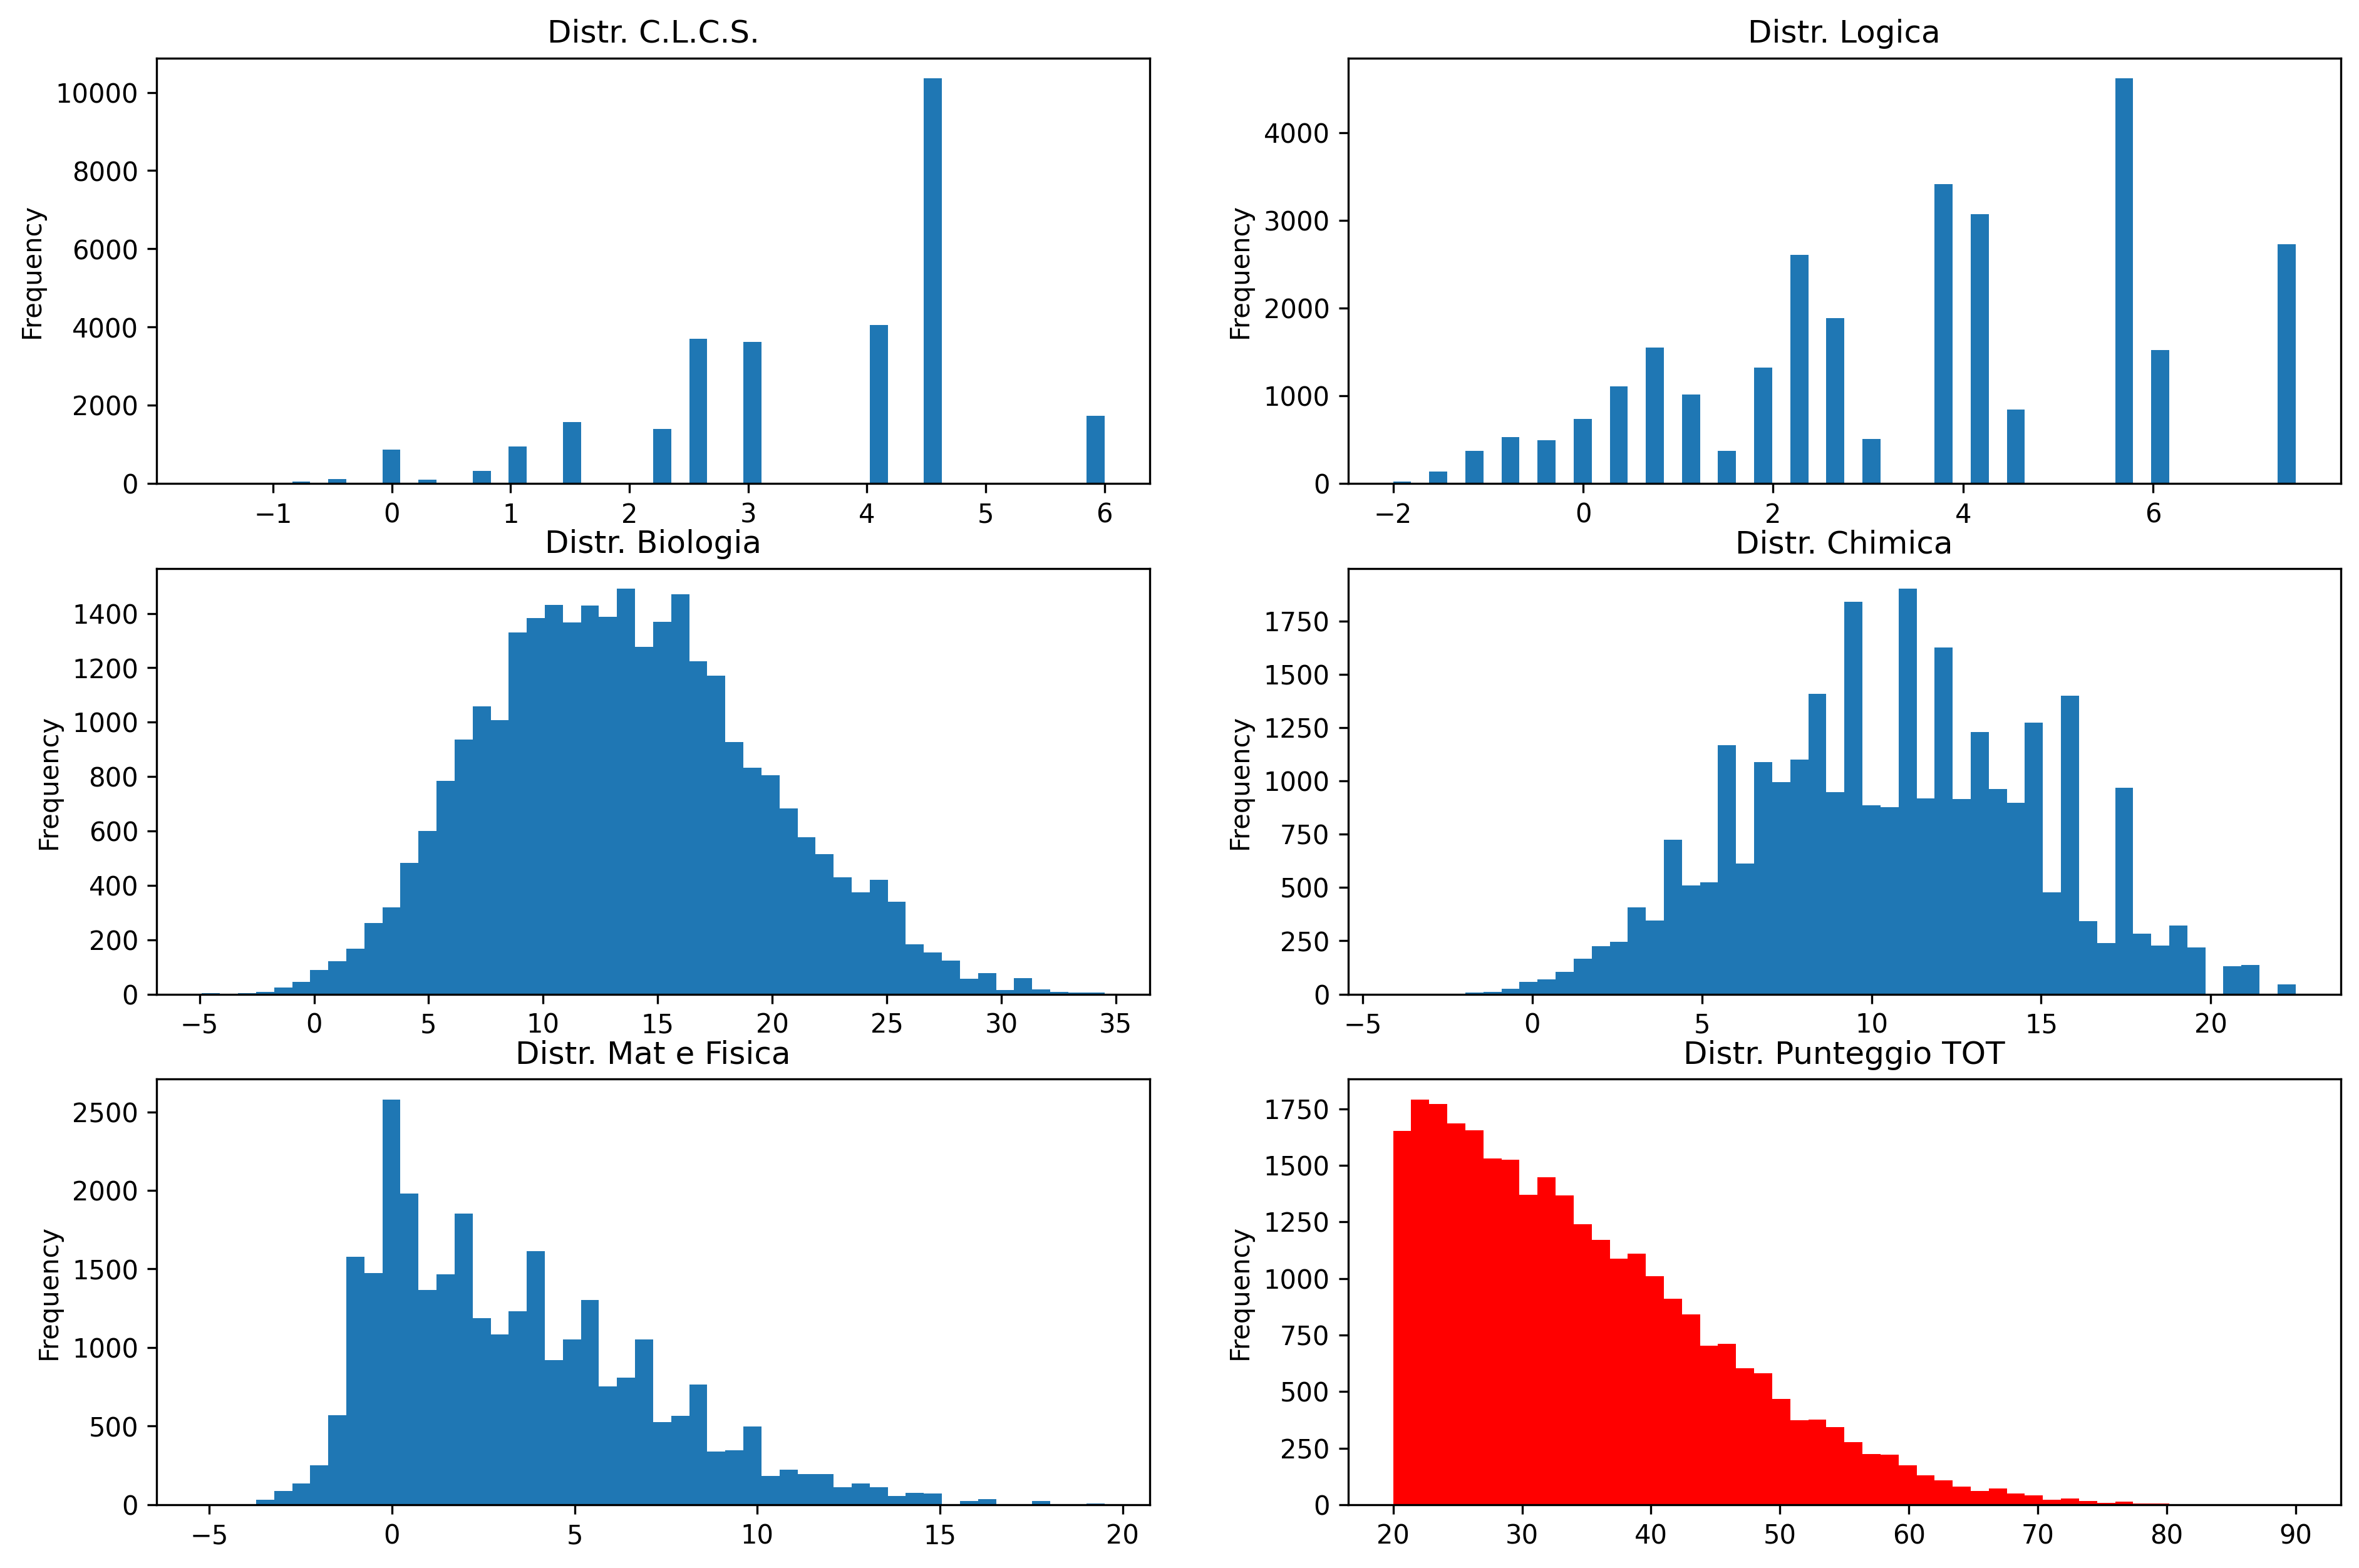

In [7]:
cols = df.columns[3:]
fig, axes = plt.subplots(3,2, figsize=(15,10), dpi=300)
i = 0
bins = 50
for x in range(3):
    for y in range(2):
        if i == 5:
            df[cols[i]].plot.hist(bins=bins, ax=axes[x,y], color="red")
        else:
            df[cols[i]].plot.hist(bins=bins, ax=axes[x,y])
        axes[x, y].set_title(f"Distr. {cols[i]}")
        i += 1
    
#plt.xticks(range(20,90,5))
plt.show()

## Minimo per ateneo

In [22]:
# let's remove the keys below the 14740th spot :(
AVAILABLE_SPOTS = 14740
df = df.iloc[:AVAILABLE_SPOTS]

# printing the minimum score
print(f"The minimum score is: {df['Punteggio TOT'].iloc[-1]}")

The minimum score is: 32.3


In [18]:
# check if an ateneo exists, can be useful later to merge the available
# spots with its city
any(df["Ateneo"].str.contains("sapienza", case=False) == True)

True

In [32]:
max_per_ateneo = df[["Ateneo", "Punteggio TOT"]].groupby(["Ateneo"]).max().sort_values(by=["Punteggio TOT"], ascending=False)
max_per_ateneo.head(10)

,Punteggio TOT
Ateneo,
Università degli Studi di VERONA,90.0
Università degli Studi di Roma La Sapienza,82.8
Università degli Studi di BOLOGNA,82.4
Universirà degli studi di Parma,81.3
Università degli Studi G. d'Annunzio CHIETI-PESCARA,79.4
Università degli Studi INSUBRIA Varese-Como,79.4
Università degli studi di Padova,79.4
Università degli Studi di TRENTO,79.0
Università degli Studi di MODENA e REGGIO EMILIA,79.0


In [45]:
posti_atenei = pd.read_csv("atenei.csv", sep=";")

12697

In [46]:
merged_df = pd.merge(left=df, right=posti_atenei, how="inner", on="Ateneo")

In [56]:
df_ateneo = merged_df[merged_df["Ateneo"].str.contains("padova", case=False)]
print(f"Hanno provato il test {len(df_ateneo)} persone ma solo il {100*(df_ateneo['Posti Disponibili'].iloc[0]/len(df_ateneo)):.2f}% potrà avere un posto")

Hanno provato il test: 983 persone ma solo il 48.12% potrà avere un posto


In [61]:
posti_pd = df_ateneo["Posti Disponibili"].iloc[0]
chosen_ones = df_ateneo[["Posizione", "Punteggio TOT"]].iloc[:posti_pd]

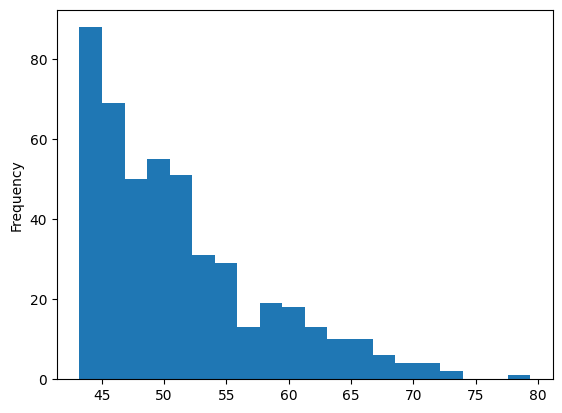

In [73]:
chosen_ones["Punteggio TOT"].plot.hist(bins=20)

plt.show()